Данные в виде таблицы были импортированы из Google Drive. название файла «DataCoSupplyChainDataset» с расширением .csv, вес которой составлял 76 MB. 

В файле «DescriptionDataCoSupplyChain» находится описание каждой из переменных.

Всего в датасете 180 519 строк и 51 колонки.


Описание признаков:

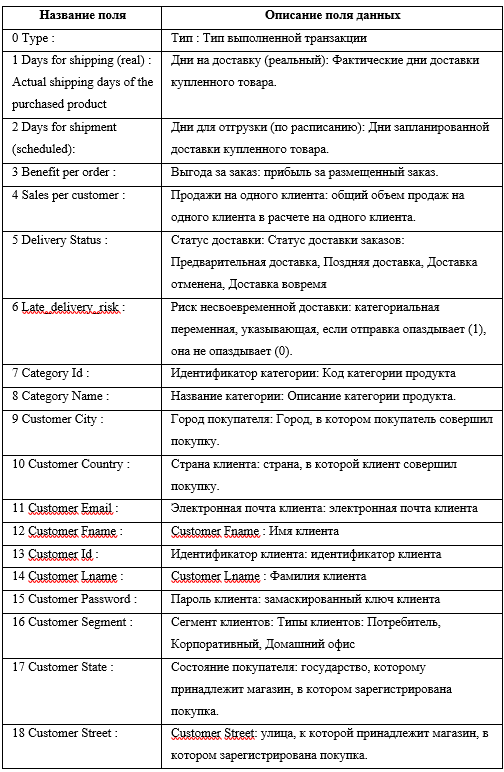
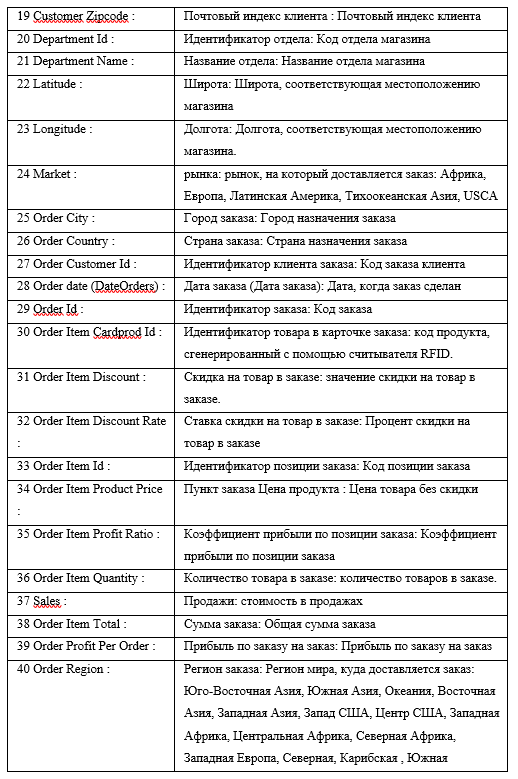
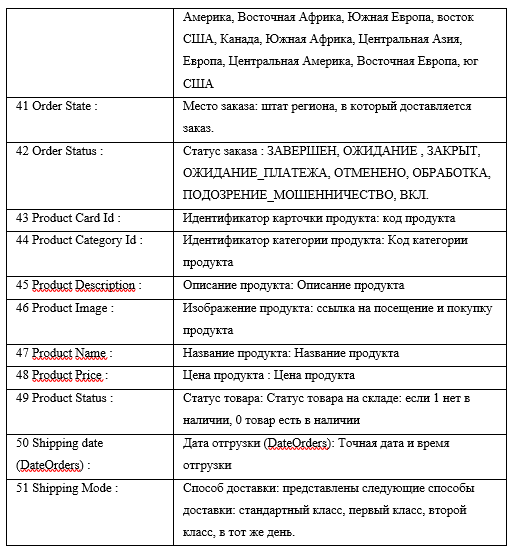

Импортирует библиотеки и загружаем датасет

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataCoSupplyChainDataset.csv', encoding='cp1252')

df_info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DescriptionDataCoSupplyChain.csv', encoding='cp1252')
df

Mounted at /content/drive


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [ ]:
# выводим информацию о датасете

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
# для удобства приведем название столбцов к нижнему регистру

df.columns = df.columns.str.lower()
df.columns

Index(['type', 'days for shipping (real)', 'days for shipment (scheduled)',
       'benefit per order', 'sales per customer', 'delivery status',
       'late_delivery_risk', 'category id', 'category name', 'customer city',
       'customer country', 'customer email', 'customer fname', 'customer id',
       'customer lname', 'customer password', 'customer segment',
       'customer state', 'customer street', 'customer zipcode',
       'department id', 'department name', 'latitude', 'longitude', 'market',
       'order city', 'order country', 'order customer id',
       'order date (dateorders)', 'order id', 'order item cardprod id',
       'order item discount', 'order item discount rate', 'order item id',
       'order item product price', 'order item profit ratio',
       'order item quantity', 'sales', 'order item total',
       'order profit per order', 'order region', 'order state', 'order status',
       'order zipcode', 'product card id', 'product category id',
       'product de

После просмотра в прикрепленном файле информацию о столбцах, можно отбросить столбцы, связанные с информацией о клиенте, поскольку они не будут иметь смысла в прогнозировании.

•	'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password'

Также для нас не будет важна информация:

•	'Latitude' – широта, соответствующая местоположению магазина

•	'Longitude' – долгота, соответствующая местоположению магазина

•	'Product Image' – ссылка на посещение и покупку продукта

Когда выполним некоторые базовые математические расчеты, мы обнаружим приведенную ниже взаимосвязь между этими столбцами:
1.	'Sales' = 'Product Price' * 'Order Item Quantity'
2.	'Order Item Total' = 'Sales' - 'Order Item Discount'
3.	'Order Item Discount' = 'Sales' * 'Order Item Discount Rate'
4.	'Order Profit Per Order'= 'Order Item Total' * 'Order Item Profit Ratio'
5.	'Order Item Discount Rate' = 100 / ('Sales' / 'Order Item Discount')

Эти функции мультиколлинеарны c 'Sales', которые не следует передавать регрессионным моделям, поскольку это повлияет на производительность модели. Поэтому, исключим эти функций из датасета.
Перезаписываем данные без перечисленных выше переменных. 


In [ ]:
# удаляем незначищие факторы

df = df.drop(['benefit per order', 'sales per customer','customer email', 
              'customer fname', 'customer id', 'customer lname', 'customer password', 
              'latitude', 'longitude', 'order date (dateorders)', 'order item cardprod id', 
              'order item product price', 'order item total', 'order profit per order', 
              'product image', 'shipping date (dateorders)', 'product price', 
              'order item discount', 'order item discount rate', 'order item quantity'], axis = 1)

In [ ]:
# далее проверяем на наличие дублей и на пропущенные значения

df.duplicated().sum()

0

In [ ]:
# смотрим на информация о пропусках

df.isnull().sum()

type                                  0
days for shipping (real)              0
days for shipment (scheduled)         0
delivery status                       0
late_delivery_risk                    0
category id                           0
category name                         0
customer city                         0
customer country                      0
customer segment                      0
customer state                        0
customer street                       0
customer zipcode                      3
department id                         0
department name                       0
market                                0
order city                            0
order country                         0
order customer id                     0
order id                              0
order item id                         0
order item profit ratio               0
sales                                 0
order region                          0
order state                           0


In [ ]:
np.round(df.isnull().sum()/ len(df) * 100, 2)

type                               0.00
days for shipping (real)           0.00
days for shipment (scheduled)      0.00
delivery status                    0.00
late_delivery_risk                 0.00
category id                        0.00
category name                      0.00
customer city                      0.00
customer country                   0.00
customer segment                   0.00
customer state                     0.00
customer street                    0.00
customer zipcode                   0.00
department id                      0.00
department name                    0.00
market                             0.00
order city                         0.00
order country                      0.00
order customer id                  0.00
order id                           0.00
order item discount                0.00
order item discount rate           0.00
order item id                      0.00
order item profit ratio            0.00
order item quantity                0.00


После вывода информации мы можем наблюдать отсутствие дублей и пропущенные значения в параметрах: 'customer zipcode’, 'product description’, 'order zipcode'.  В данной ситуации смотрим на процентное соотношение пропущенных значений к общей сумме всех значений в столбце. В параметрах 'product description' и 'order zipcode' это число превышает 80%, принимаем решение удалить данные столбцы. В 'customer zipcode' заменим пропущенные значения на часто используемые в данной колонке.

In [ ]:
# удаляем колонки где нан больше 80 процентов

nan_perc = 80

df = df.drop(df[df.columns[df.isnull().sum()/ len(df) * 100 > nan_perc]],
             axis = 1)

In [ ]:
# Заменим пропущенные значения на часто используемые в данной колонке

df['customer zipcode'] = df['customer zipcode'].fillna(int(df['customer zipcode'].mode()))

In [ ]:
# используем функцию для создания описательной статистики.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
days for shipping (real),180519.0,3.497654,1.623722,0.00,2.000000,3.000000,5.000000,6.00000
days for shipment (scheduled),180519.0,2.931847,1.374449,0.00,2.000000,4.000000,4.000000,4.00000
late_delivery_risk,180519.0,0.548291,0.497664,0.00,0.000000,1.000000,1.000000,1.00000
category id,180519.0,31.851451,15.640064,2.00,18.000000,29.000000,45.000000,76.00000
customer zipcode,180519.0,35920.541998,37542.423343,603.00,725.000000,19380.000000,78207.000000,99205.00000
department id,180519.0,5.443460,1.629246,2.00,4.000000,5.000000,7.000000,12.00000
order customer id,180519.0,6691.379495,4162.918106,1.00,3258.500000,6457.000000,9779.000000,20757.00000
order id,180519.0,36221.894903,21045.379569,1.00,18057.000000,36140.000000,54144.000000,77204.00000
order item id,180519.0,90260.000000,52111.490959,1.00,45130.500000,90260.000000,135389.500000,180519.00000
order item profit ratio,180519.0,0.120647,0.466796,-2.75,0.080000,0.270000,0.360000,0.50000


In [ ]:
# удаляем, так как все значения 'product status' нули

df = df.drop(['product status'], axis = 1)

# **Подготовка данных к исследованию**

В данном датасете присутствуют категориальные переменные, а большинство алгоритмов машинного обучения не могут обрабатывать их, если они не преобразованы в числовые значения. В данной работе остановлюсь на двух способах кодирования категориальных признаков – это **LabelEncoder** и **get_dummies**.

## Кодирование с помощью get_dummies

В этом методе мы сопоставляем каждую категорию с вектором, который содержит 1 и 0, обозначая наличие или отсутствие функции. Количество векторов зависит от количества категорий для объекта. Этот метод создает множество столбцов, которые значительно замедляют процесс обучения, так как число категорий для функции очень велико.

### преобразовываем категориальные признаки

In [ ]:
df_d = pd.DataFrame()
df_d = df

df_d = pd.get_dummies(df, drop_first = True, dummy_na = True)
df_d

,days for shipping (real),days for shipment (scheduled),late_delivery_risk,category id,customer zipcode,department id,order customer id,order id,order item id,order item profit ratio,...,product name_adidas Kids' F5 Messi FG Soccer Cleat,product name_adidas Men's F10 Messi TRX FG Soccer Cleat,product name_adidas Men's Germany Black Crest Away Tee,product name_adidas Youth Germany Black/Red Away Match Soc,product name_insta-bed Neverflat Air Mattress,product name_nan,shipping mode_Same Day,shipping mode_Second Class,shipping mode_Standard Class,shipping mode_nan
0,3,4,0,73,725.0,2,20755,77202,180517,0.29,...,0,0,0,0,0,0,0,0,1,0
1,5,4,1,73,725.0,2,19492,75939,179254,-0.80,...,0,0,0,0,0,0,0,0,1,0
2,4,4,0,73,95125.0,2,19491,75938,179253,-0.80,...,0,0,0,0,0,0,0,0,1,0
3,3,4,0,73,90027.0,2,19490,75937,179252,0.08,...,0,0,0,0,0,0,0,0,1,0
4,2,4,0,73,725.0,2,19489,75936,179251,0.45,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,0,45,11207.0,7,1005,26043,65177,0.10,...,0,0,0,0,0,0,0,0,1,0
180515,3,2,1,45,93304.0,7,9141,26037,65161,-1.55,...,0,0,0,0,0,0,0,1,0,0
180516,5,4,1,45,6010.0,7,291,26024,65129,0.36,...,0,0,0,0,0,0,0,0,1,0
180517,3,4,0,45,725.0,7,2813,26022,65126,0.48,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_d.info()

# uint8 - Целые числа в диапазоне от 0 по 255 (числа размером 1 байт).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Columns: 13163 entries, days for shipping (real) to shipping mode_nan
dtypes: float64(3), int64(10), uint8(13150)
memory usage: 2.2 GB


In [ ]:
# находим столбцы с одинаковыми значениями

list_to_del = []
for col in df_d.columns: 
  if len(df_d[col].unique()) == 1:
    list_to_del.append(col)
list_to_del

['type_nan',
 'delivery status_nan',
 'category name_nan',
 'customer city_nan',
 'customer country_nan',
 'customer segment_nan',
 'customer state_nan',
 'customer street_nan',
 'department name_nan',
 'market_nan',
 'order city_nan',
 'order country_nan',
 'order region_nan',
 'order state_nan',
 'order status_nan',
 'product name_nan',
 'shipping mode_nan']

In [ ]:
df_d = df_d.drop(list_to_del, axis = 1)

In [ ]:
# находим столбцы с малым количеством либо нулей, либо единиц

min_perc = 0.03
list_to_del2 = []
for col in df_d.columns: 
  if len(df_d[col].unique()) == 2 and (df_d[col].mean() < min_perc or df_d[col].mean() > (1-min_perc)):
    list_to_del2.append(col)
len(list_to_del2)

13059

In [ ]:
df_d = df_d.drop(list_to_del2, axis = 1)

### Избавляемся от мультиколлинеарности

In [ ]:
# переобразовываем объект в значение с плавующей точкой

df1 =pd.DataFrame()
df1 = df_d

for columns in df1.columns:
  df1[columns] = df1[columns].astype (float)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   days for shipping (real)                                    180519 non-null  float64
 1   days for shipment (scheduled)                               180519 non-null  float64
 2   late_delivery_risk                                          180519 non-null  float64
 3   category id                                                 180519 non-null  float64
 4   customer zipcode                                            180519 non-null  float64
 5   department id                                               180519 non-null  float64
 6   order customer id                                           180519 non-null  float64
 7   order id                                                    180519 non-nul

In [ ]:
df1.corr().style.background_gradient(cmap = 'coolwarm')

Перед тем как перейти к моделированию поделим наш датасет на тренировочную и тестовую выборку. Создадим вторую пару выборок для стандартизации признаков (назовем - 'X_train_std', 'X_test_std', 'Y_train_std', 'Y_test_std').

In [ ]:
from sklearn.model_selection import train_test_split
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(df1.drop('sales', axis = 1), df1['sales'])


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('sales', axis = 1), df1['sales'])

In [ ]:
# избавляемся от мультиколлинеарности

factors = []
cor_max = 0.7
target = 'sales'
df1 = df1[[target] + [x for x in df1.columns if x != target]]
cor_matrix = df1.corr()
for i in range(1, len(cor_matrix)-1):
  for j in range(i+1,len(cor_matrix)):
    if np.abs(cor_matrix.iloc[i, j]) >= cor_max:
      if abs(cor_matrix.iloc[0, j]) > abs(cor_matrix.iloc[0, i]):
        factors.append(i)
      else:
        factors.append(j)

cor_matrix.columns[list(set(factors))]
X_train = X_train.drop(cor_matrix.columns[list(set(factors))], axis = 1)
X_test = X_test.drop(cor_matrix.columns[list(set(factors))], axis = 1)

X_train_std = X_train_std.drop(cor_matrix.columns[list(set(factors))], axis = 1)
X_test_std = X_test_std.drop(cor_matrix.columns[list(set(factors))], axis = 1)

### Масштабирование

Напишем цикл, который выберет столбцы где уникальных значений больше двух и создадим коробчатую диаграмму, чтобы посмотреть выбросы или аномальные значения через функцию 'boxplot'.

<Axes: >

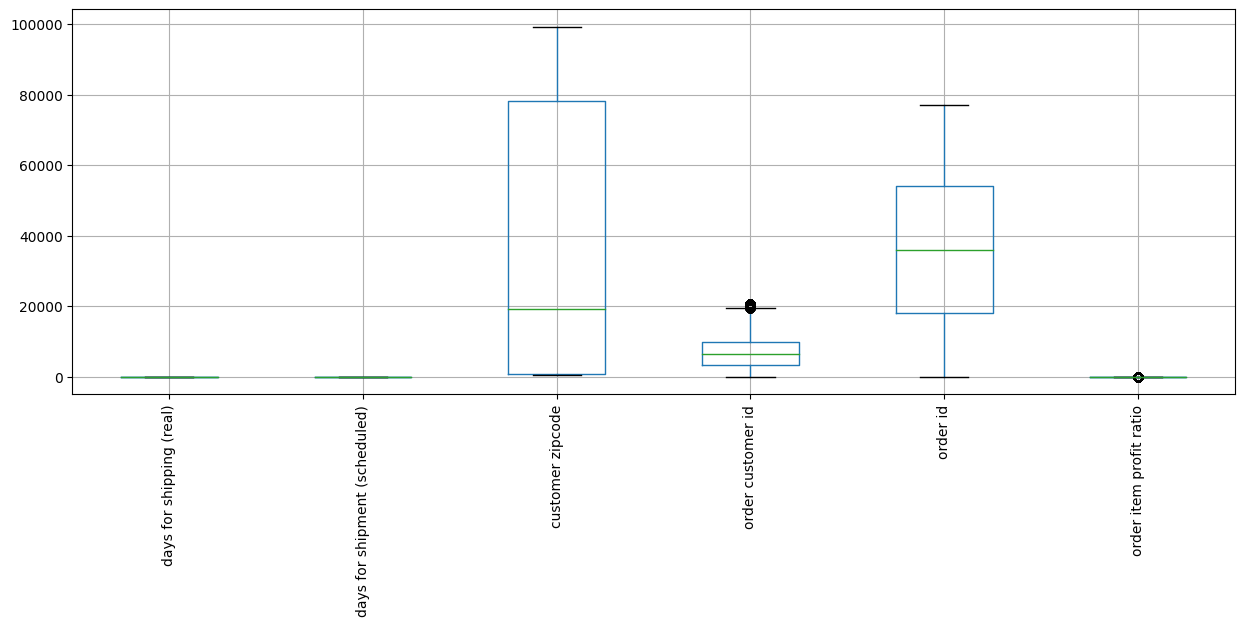

In [ ]:
one_factors = []
for col in X_train_std.columns: 
  if len(X_train_std[col].unique()) <= 2:
    one_factors.append(col)
X_train_std.drop(one_factors, axis = 1).boxplot(figsize = (15, 5), rot = 90)

На диаграмме мы видим, что переменные 'customer zipcode', 'order id' и 'order customer id' сильно отличаются от других, в данном случае их нужно привести к одному масштабу, чтобы каждый признак был одинаково важен.
Используем StandardScaler для стандартизации переменных в 'X_train_std', 'X_test_std', 'Y_train_std', 'Y_test_std'.


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric = [ 'order id', 'customer zipcode', 'order customer id', 'order item profit ratio']
scaler = StandardScaler()
scaler.fit(X_train_std[numeric])
X_train_std[numeric] = scaler.transform(X_train_std[numeric])
X_train_std.head()

,days for shipping (real),days for shipment (scheduled),late_delivery_risk,customer zipcode,order customer id,order id,order item profit ratio,type_DEBIT,type_PAYMENT,type_TRANSFER,...,order region_Western Europe,order status_CLOSED,order status_ON_HOLD,order status_PENDING,order status_PROCESSING,product name_Nike Men's Free 5.0+ Running Shoe,product name_Pelican Sunstream 100 Kayak,product name_Perfect Fitness Perfect Rip Deck,shipping mode_Same Day,shipping mode_Second Class
146281,1.0,0.0,1.0,0.029021,-0.395598,0.552011,0.363047,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
153503,4.0,2.0,1.0,0.232484,-0.631234,-0.268039,-3.473295,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
174992,6.0,4.0,1.0,-0.938264,0.706924,0.731189,0.491640,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73801,5.0,4.0,1.0,0.245652,-1.116720,0.482310,0.598800,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28298,2.0,1.0,1.0,1.562795,-0.383070,-1.337493,-0.022730,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler.fit(X_test_std[numeric])
X_test_std[numeric] = scaler.transform(X_test_std[numeric])
X_test_std.head()

,days for shipping (real),days for shipment (scheduled),late_delivery_risk,customer zipcode,order customer id,order id,order item profit ratio,type_DEBIT,type_PAYMENT,type_TRANSFER,...,order region_Western Europe,order status_CLOSED,order status_ON_HOLD,order status_PENDING,order status_PROCESSING,product name_Nike Men's Free 5.0+ Running Shoe,product name_Pelican Sunstream 100 Kayak,product name_Perfect Fitness Perfect Rip Deck,shipping mode_Same Day,shipping mode_Second Class
24995,2.0,1.0,1.0,-0.107487,2.333264,1.742666,-6.138439,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55176,4.0,4.0,0.0,1.447282,0.385391,1.036770,-0.086869,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99999,6.0,4.0,1.0,-0.432528,-1.449465,0.097933,0.490489,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153428,2.0,4.0,0.0,-0.939147,0.803220,-0.252427,0.725709,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165357,2.0,1.0,1.0,-0.496246,-0.140188,-1.567264,0.469105,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

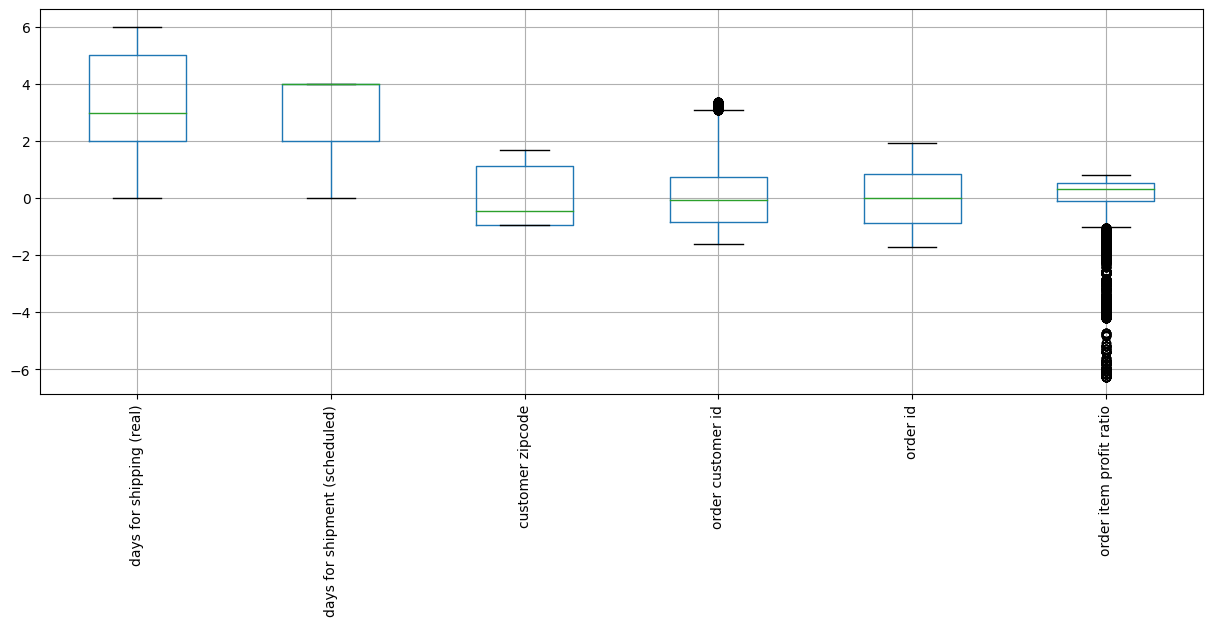

In [ ]:
# проверяем

one_factors = []
for col in X_test_std.columns: 
  if len(X_test_std[col].unique()) <= 2:
    one_factors.append(col)
X_test_std.drop(one_factors, axis = 1).boxplot(figsize = (15, 5), rot = 90)

### Обучаем и предсказываем модели

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y_train_std, sm.add_constant(X_train_std)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1939.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:20:00   Log-Likelihood:            -8.1403e+05
No. Observations:              135389   AIC:                         1.628e+06
Df Residuals:                  135334   BIC:                         1.629e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
p_max = 0.06

while np.max(model.pvalues[1:]) > p_max:
  col = X_train_std.columns[np.argmax(model.pvalues[1:])]
  X_train_std = X_train_std.drop(col, axis = 1)
  X_test_std = X_test_std.drop(col, axis = 1)
  model = sm.OLS(Y_train_std, sm.add_constant(X_train_std)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     3173.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:20:20   Log-Likelihood:            -8.1403e+05
No. Observations:              135389   AIC:                         1.628e+06
Df Residuals:                  135355   BIC:                         1.628e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [ ]:
# для удобства вывода в дальнейшем - соберем показатели в списки

table_of_model = []
table_of_mse = []
table_of_mae = []
table_of_r2 = []

Линейная регрессиия

In [ ]:
from sklearn import metrics

lr_pred = model.predict(sm.add_constant(X_test_std))

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test_std, lr_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test_std, lr_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test_std, lr_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test_std, lr_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test_std, lr_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test_std, lr_pred), 2))
table_of_model.append('LinearRegression')

Mean Squared Error: 10433.63

Mean Absolute Error: 55.65

R2 Score: 0.42


K-ближайших соседей

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor

knn = sklearn.neighbors.KNeighborsRegressor().fit(X_train_std, Y_train_std)
knn_pred = knn.predict(X_test_std)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test_std, knn_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test_std, knn_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test_std, knn_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test_std, knn_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test_std, knn_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test_std, knn_pred), 2))
table_of_model.append('KNeighborsRegressor')

Mean Squared Error: 7748.13

Mean Absolute Error: 48.78

R2 Score: 0.57


Деревья решений

In [ ]:
from sklearn import tree 
decision_tree = tree.DecisionTreeRegressor().fit(X_train, Y_train) 
tree_pred = decision_tree.predict(X_test)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test, tree_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test, tree_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test, tree_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test, tree_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test, tree_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test, tree_pred), 2))
table_of_model.append('DecisionTreeRegressor')

Mean Squared Error: 8537.54

Mean Absolute Error: 52.56

R2 Score: 0.51


Случайный лес

In [ ]:
import sklearn
from sklearn import ensemble

rf = sklearn.ensemble.RandomForestRegressor().fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test, rf_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test, rf_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test, rf_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test, rf_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test, rf_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test, rf_pred), 2))
table_of_model.append('RandomForestRegressor')

Градиентный бустинг

In [ ]:
gb = sklearn.ensemble.GradientBoostingRegressor(loss='squared_error', 
                                                learning_rate=0.8, 
                                                n_estimators=90, 
                                                subsample=1.0).fit(X_train, Y_train)
gb_pred = gb.predict(X_test)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test, gb_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test, gb_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test, gb_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test, gb_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test, gb_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test, gb_pred), 2))
table_of_model.append('GradientBoostingRegressor')

Mean Squared Error: 4685.34

Mean Absolute Error: 41.15

R2 Score: 0.73


### Вывод

Кодирование с помощью get_dummies

In [ ]:
table_of_models = (pd.DataFrame({'Model':table_of_model, 
                                 'MSE':table_of_mse,'MAE':table_of_mae,
                                 'R2 Score':table_of_r2}).sort_values(by='MSE').reset_index(drop=True))

table_of_models

,Model,MSE,MAE,R2 Score
0,RandomForestRegressor,4580.88,40.82,0.74
1,GradientBoostingRegressor,4685.34,41.15,0.73
2,KNeighborsRegressor,7748.13,48.78,0.57
3,DecisionTreeRegressor,8537.54,52.56,0.51
4,LinearRegression,10433.63,55.65,0.42


## Кодирование с помощью LabelEncoder

Данный тип кодирования является наиболее часто используемым, преобразование представляет собой однозначное соответствие числа – уникальное значение категориального признака.

Первое уникальное значение кодируется нулем, второе единицей, и так далее, последнее кодируется числом, равным количеству уникальных значений минус единица.


In [ ]:
df_le = pd.DataFrame()

df_le = df

По аналогии с предыдущим методом – создаём новый dataframe и используем цикл для кодирования категориальных признаков.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
  if df_le[i].dtypes == 'object':
    df_le.loc[:, i] = le.fit_transform(df_le.loc[:, i])

<ipython-input-8-cd4f68171bc0>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, i] = le.fit_transform(df_le.loc[:, i])
<ipython-input-8-cd4f68171bc0>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, i] = le.fit_transform(df_le.loc[:, i])
<ipython-input-8-cd4f68171bc0>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df

In [ ]:
for columns in df_le.columns:
  df_le[columns] = df_le[columns].astype (float)

In [ ]:
df_le.corr().style.background_gradient(cmap = 'coolwarm')

,type,days for shipping (real),days for shipment (scheduled),delivery status,late_delivery_risk,category id,category name,customer city,customer country,customer segment,customer state,customer street,customer zipcode,department id,department name,market,order city,order country,order customer id,order id,order item id,order item profit ratio,sales,order region,order state,order status,product card id,product category id,product name,shipping mode
type,1.000000,0.004855,0.000690,0.045581,-0.061529,-0.000013,-0.002256,-0.009135,0.005928,-0.000613,0.002421,0.001147,-0.005850,-0.000867,-0.000598,-0.001964,-0.006535,-0.004716,0.000980,0.005657,0.005823,-0.002028,0.000960,-0.001376,-0.006733,0.806072,0.000342,-0.000013,0.001838,0.000030
days for shipping (real),0.004855,1.000000,0.515880,0.027074,0.401415,-0.000348,-0.001772,-0.002774,0.002835,0.002051,0.005305,-0.006534,0.000114,-0.001631,-0.002275,-0.001069,0.003211,0.001969,0.003432,-0.001711,-0.001769,-0.004638,0.001962,-0.003798,0.004419,0.008486,-0.000859,-0.000348,-0.002508,0.515659
days for shipment (scheduled),0.000690,0.515880,1.000000,-0.172323,-0.369352,-0.000367,-0.003157,-0.005289,0.005005,-0.000086,0.009646,-0.005287,-0.003020,-0.000262,-0.002728,-0.001913,-0.000784,0.004546,0.000899,-0.001878,-0.001848,-0.001822,0.006327,-0.009411,0.004274,0.003758,-0.000431,-0.000367,-0.007935,0.919296
delivery status,0.045581,0.027074,-0.172323,1.000000,-0.190507,-0.001444,0.000684,-0.000676,-0.003267,-0.002875,0.000311,-0.000093,0.001406,-0.000742,-0.007667,0.003374,-0.000831,-0.001389,0.000009,0.004640,0.004687,0.001444,-0.001442,0.001368,0.007363,0.000054,-0.001364,-0.001444,-0.000711,-0.081300
late_delivery_risk,-0.061529,0.401415,-0.369352,-0.190507,1.000000,0.001752,-0.001361,0.005082,-0.001044,0.001419,-0.001839,-0.000965,0.003154,0.001077,0.002356,-0.000578,0.003838,-0.001649,0.001484,-0.001293,-0.001376,-0.002316,-0.003564,0.006159,0.001223,-0.004130,0.001490,0.001752,0.003992,-0.401375
category id,-0.000013,-0.000348,-0.000367,-0.001444,0.001752,1.000000,0.143516,0.000381,-0.001789,0.000409,-0.002583,0.005630,0.002862,0.888835,0.168537,0.033876,-0.005458,-0.031489,0.274633,0.198496,0.186796,-0.001614,0.227483,0.019623,0.010669,0.000756,0.991092,1.000000,-0.306073,0.000235
category name,-0.002256,-0.001772,-0.003157,0.000684,-0.001361,0.143516,1.000000,-0.004669,0.000666,-0.000019,0.003215,-0.001427,-0.001610,0.119397,0.216530,0.020256,-0.002315,-0.002435,0.004451,0.006751,0.005015,-0.001566,-0.355216,-0.011948,0.006086,-0.003225,0.124571,0.143516,0.253764,-0.002616
customer city,-0.009135,-0.002774,-0.005289,-0.000676,0.005082,0.000381,-0.004669,1.000000,-0.587896,-0.011156,-0.407381,0.001821,0.472400,0.000181,0.002320,-0.004767,0.003531,0.001824,-0.005070,-0.005531,-0.005618,0.000709,-0.000089,-0.002795,0.002517,-0.007927,0.000165,0.000381,-0.002594,-0.003250
customer country,0.005928,0.002835,0.005005,-0.003267,-0.001044,-0.001789,0.000666,-0.587896,1.000000,0.011621,0.596156,0.000131,-0.740584,-0.001874,-0.003548,-0.002206,0.004460,-0.000164,0.007095,0.004112,0.004157,-0.001328,0.001202,0.000580,0.004149,0.008578,-0.001810,-0.001789,0.001794,0.001570
customer segment,-0.000613,0.002051,-0.000086,-0.002875,0.001419,0.000409,-0.000019,-0.011156,0.011621,1.000000,0.000630,0.019820,-0.004021,0.000621,-0.002617,-0.000108,-0.004163,-0.002018,0.003584,-0.000282,-0.000352,-0.001883,-0.004862,-0.003148,0.003946,-0.003060,-0.000197,0.000409,0.001769,-0.001634


In [ ]:
from sklearn.model_selection import train_test_split
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(df_le.drop('sales', axis = 1), df_le['sales'])


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_le.drop('sales', axis = 1), df_le['sales'])

In [ ]:
# избавляемся от мультиколлинеарности

factors = []
cor_max = 0.7
target = 'sales'
df_le = df_le[[target] + [x for x in df_le.columns if x != target]]
cor_matrix = df_le.corr()
for i in range(1, len(cor_matrix)-1):
  for j in range(i+1,len(cor_matrix)):
    if np.abs(cor_matrix.iloc[i, j]) >= cor_max:
      if abs(cor_matrix.iloc[0, j]) > abs(cor_matrix.iloc[0, i]):
        factors.append(i)
      else:
        factors.append(j)

cor_matrix.columns[list(set(factors))]
X_train = X_train.drop(cor_matrix.columns[list(set(factors))], axis = 1)
X_test = X_test.drop(cor_matrix.columns[list(set(factors))], axis = 1)

X_train_std = X_train_std.drop(cor_matrix.columns[list(set(factors))], axis = 1)
X_test_std = X_test_std.drop(cor_matrix.columns[list(set(factors))], axis = 1)

<Axes: >

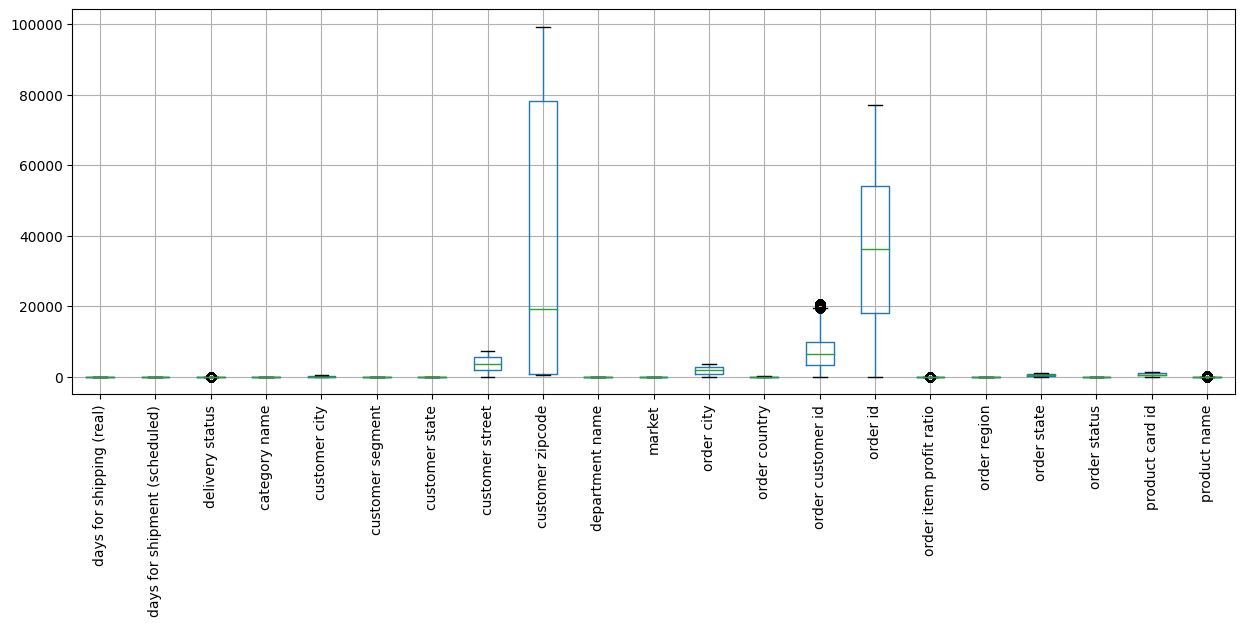

In [ ]:
one_factors = []
for col in X_train_std.columns: 
  if len(X_train_std[col].unique()) <= 2:
    one_factors.append(col)
X_train_std.drop(one_factors, axis = 1).boxplot(figsize = (15, 5), rot = 90)

In [ ]:
df_le.columns

Index(['sales', 'type', 'days for shipping (real)',
       'days for shipment (scheduled)', 'delivery status',
       'late_delivery_risk', 'category id', 'category name', 'customer city',
       'customer country', 'customer segment', 'customer state',
       'customer street', 'customer zipcode', 'department id',
       'department name', 'market', 'order city', 'order country',
       'order customer id', 'order id', 'order item id',
       'order item profit ratio', 'order region', 'order state',
       'order status', 'product card id', 'product category id',
       'product name', 'shipping mode'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric = ['customer street', 'customer zipcode', 'order customer id', 'order id', 
           'order city', 'order state', 'product card id','customer city', 
           'order country', 'product name', 'category name', 'customer state', 'order region']
scaler = StandardScaler()
scaler.fit(X_train_std[numeric])
X_train_std[numeric] = scaler.transform(X_train_std[numeric])
X_train_std.head()

,days for shipping (real),days for shipment (scheduled),delivery status,late_delivery_risk,category name,customer city,customer segment,customer state,customer street,customer zipcode,...,order city,order country,order customer id,order id,order item profit ratio,order region,order state,order status,product card id,product name
145042,6.0,2.0,1.0,1.0,0.226112,2.158668,0.0,-0.316728,0.988098,0.324967,...,0.016137,1.308531,-0.234742,-1.150185,0.33,-0.304907,-0.314238,6.0,0.954765,0.361299
28610,2.0,1.0,1.0,1.0,-1.180398,1.283230,1.0,-1.618445,-0.588360,1.485411,...,-0.290577,0.973928,-0.034802,0.521212,0.42,0.984436,-0.171092,6.0,-1.489166,0.105631
76102,4.0,4.0,3.0,0.0,1.351320,-0.796712,0.0,0.755274,-0.270653,-0.938735,...,-0.125270,1.404131,0.210023,-1.526595,0.35,-1.594249,0.040375,6.0,1.129968,0.489134
141904,6.0,2.0,1.0,1.0,0.507414,-0.796712,2.0,0.755274,-1.567492,-0.938735,...,-1.835103,-0.961985,1.112036,1.439885,0.43,1.414216,-0.672105,2.0,-0.859623,-0.107427
107504,6.0,4.0,1.0,1.0,0.226112,-0.796712,0.0,0.755274,-1.533121,-0.938735,...,-0.033654,0.950028,-0.152174,0.812773,0.17,-1.307728,0.079415,6.0,0.954765,0.361299


In [ ]:
scaler.fit(X_test_std[numeric])
X_test_std[numeric] = scaler.transform(X_test_std[numeric])
X_test_std.head()

,days for shipping (real),days for shipment (scheduled),delivery status,late_delivery_risk,category name,customer city,customer segment,customer state,customer street,customer zipcode,...,order city,order country,order customer id,order id,order item profit ratio,order region,order state,order status,product card id,product name
49541,6.0,2.0,1.0,1.0,-1.184832,1.669571,1.0,-1.627828,-0.251083,1.519109,...,1.208413,-1.356791,1.150415,-0.418351,0.14,-0.161741,0.608976,2.0,-1.494968,0.107374
116717,2.0,1.0,1.0,1.0,1.428466,0.267953,0.0,0.138254,1.285827,-0.763470,...,0.946823,-0.401844,-0.840765,0.166402,0.28,1.268468,-1.185861,7.0,-0.568060,0.022394
60684,6.0,4.0,1.0,1.0,0.510280,1.233512,1.0,0.675757,1.066201,-0.442694,...,0.714078,0.887334,0.652199,1.055220,-1.70,-1.305908,0.889114,3.0,-0.863121,-0.105077
87924,3.0,4.0,0.0,0.0,0.510280,1.476459,0.0,0.368613,0.577990,-0.594695,...,-0.042841,0.887334,-0.206737,-1.573403,0.29,-1.305908,-0.544150,6.0,-0.863121,-0.105077
69028,1.0,0.0,1.0,1.0,1.428466,-0.791047,1.0,0.752544,0.099571,-0.933764,...,0.015843,-0.425718,0.697469,-1.043557,0.47,0.696385,-1.674473,6.0,-0.568060,0.022394


<Axes: >

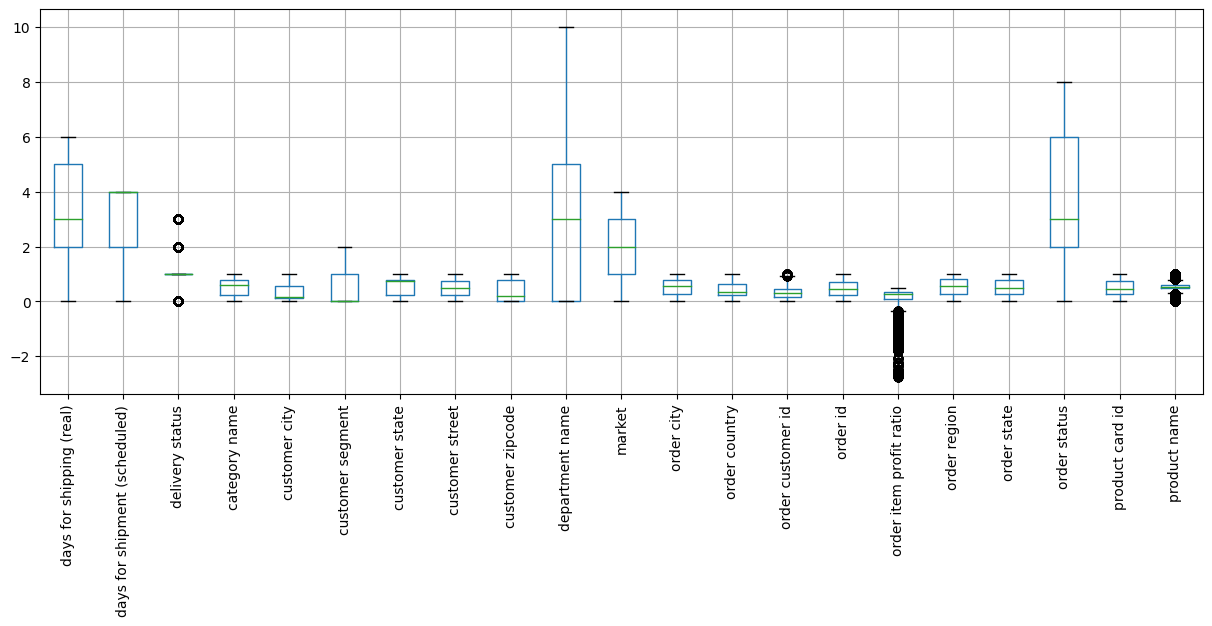

In [ ]:
one_factors = []
for col in X_test_std.columns: 
  if len(X_test_std[col].unique()) <= 2:
    one_factors.append(col)
X_test_std.drop(one_factors, axis = 1).boxplot(figsize = (15, 5), rot = 90)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y_train_std, sm.add_constant(X_train_std)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     2429.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:36:14   Log-Likelihood:            -8.3107e+05
No. Observations:              135389   AIC:                         1.662e+06
Df Residuals:                  135366   BIC:                         1.662e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
p_max = 0.06

while np.max(model.pvalues[1:]) > p_max:
  col = X_train_std.columns[np.argmax(model.pvalues[1:])]
  X_train_std = X_train_std.drop(col, axis = 1)
  X_test_std = X_test_std.drop(col, axis = 1)
  model = sm.OLS(Y_train_std, sm.add_constant(X_train_std)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     5344.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:36:18   Log-Likelihood:            -8.3107e+05
No. Observations:              135389   AIC:                         1.662e+06
Df Residuals:                  135378   BIC:                         1.662e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              191.4007      0.810  

In [ ]:
# для удобства вывода в дальнейшем - соберем показатели в списки

table_of_model = []
table_of_mse = []
table_of_mae = []
table_of_r2 = []

Линейная регрессиия

In [ ]:
from sklearn import metrics

lr_pred = model.predict(sm.add_constant(X_test_std))
print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test_std, lr_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test_std, lr_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test_std, lr_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test_std, lr_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test_std, lr_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test_std, lr_pred), 2))
table_of_model.append('LinearRegression')

K-ближайших соседей

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor

knn = sklearn.neighbors.KNeighborsRegressor().fit(X_train_std, Y_train_std)
knn_pred = knn.predict(X_test_std)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test_std, knn_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test_std, knn_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test_std, knn_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test_std, knn_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test_std, knn_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test_std, knn_pred), 2))
table_of_model.append('KNeighborsRegressor')

Mean Squared Error: 6030.96

Mean Absolute Error: 44.99

R2 Score: 0.64


Деревья решений

In [ ]:
from sklearn import tree 
decision_tree = tree.DecisionTreeRegressor().fit(X_train, Y_train) 
tree_pred = decision_tree.predict(X_test)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test, tree_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test, tree_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test, tree_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test, tree_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test, tree_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test, tree_pred), 2))
table_of_model.append('DecisionTreeRegressor')

Mean Squared Error: 7937.89

Mean Absolute Error: 50.32

R2 Score: 0.55


Случайный лес

In [ ]:
import sklearn
from sklearn import ensemble
rf = sklearn.ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15).fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test, rf_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test, rf_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test, rf_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test, rf_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test, rf_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test, rf_pred), 2))
table_of_model.append('RandomForestRegressor')

Градиентный бустинг

In [ ]:
gb = sklearn.ensemble.GradientBoostingRegressor().fit(X_train, Y_train)
gb_pred = gb.predict(X_test)

print('Mean Squared Error:', np.round(metrics.mean_squared_error(Y_test, gb_pred), 2)) 
print()
print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(Y_test, gb_pred), 2)) 
print()
print('R2 Score:', np.round(metrics.r2_score(Y_test, gb_pred), 2)) 

table_of_mse.append(np.round(metrics.mean_squared_error(Y_test, gb_pred), 2))
table_of_mae.append(np.round(metrics.mean_absolute_error(Y_test, gb_pred), 2))
table_of_r2.append(np.round(metrics.r2_score(Y_test, gb_pred), 2))
table_of_model.append('GradientBoostingRegressor')

Mean Squared Error: 4121.22

Mean Absolute Error: 40.57

R2 Score: 0.76


### Вывод

Кодирование с помощью get_dummies

In [ ]:
table_of_models = (pd.DataFrame({'Model':table_of_model, 
                                 'MSE':table_of_mse,'MAE':table_of_mae,
                                 'R2 Score':table_of_r2}).sort_values(by='MSE').reset_index(drop=True))

table_of_models

,Model,MSE,MAE,R2 Score
0,RandomForestRegressor,4580.88,40.82,0.74
1,GradientBoostingRegressor,4685.34,41.15,0.73
2,KNeighborsRegressor,7748.13,48.78,0.57
3,DecisionTreeRegressor,8537.54,52.56,0.51
4,LinearRegression,10433.63,55.65,0.42


Кодирование с помощью LabelEncoder

In [ ]:
table_of_models = (pd.DataFrame({'Model':table_of_model, 
                                 'MSE':table_of_mse,'MAE':table_of_mae,
                                 'R2 Score':table_of_r2}).sort_values(by='MSE').reset_index(drop=True))

table_of_models

,Model,MSE,MAE,R2 Score
0,RandomForestRegressor,3950.49,38.11,0.77
1,GradientBoostingRegressor,4100.29,40.66,0.76
2,KNeighborsRegressor,4931.16,42.18,0.72
3,DecisionTreeRegressor,7931.74,50.63,0.53
4,LinearRegression,12331.90,76.56,0.29


Обычно метрики качества сравнивают с тривиальной моделью, для того чтобы оценить, насколько показатели данной модели улучшились или ухудшились. В данной работе используется тривиальная модель MSE.

In [ ]:
print('trivial mse:', np.round(np.mean((Y_test - Y_train.mean())**2), 2))

trivial mse: 17578.0


Исходя из полученных данных можно сделать вывод: лучше всех себя показала модель Случайный лес (RandomForest) в обоих выборках, где показатель MSE по сравнению с тривиальной моделью улучшился в 3,8 и 4,5 раза соответственно. Также к аналогичным показателям приблизилась модель Градиентного бустинга (Gradient Boosting).

Если сравнивать кодировщики, то тут на первый план выходит LabelEncoder и он заметно отличается от выборки где применяли кодировщик get_dummies. Главным плюсом кодировщика LabelEncoder выступает его простота и он занимает меньше объема памяти, что положительно сказывается на скорости предсказания моделей. Минус – данный вид кодировки не подходит для линейной модели (Linear Regression) и модели с ближайшими соседями (K-Neighbors Regresso).

По итогу: применение кодировщика get_dummies является правильным вариантом, так как не создаёт дисбаланс переменных и удобна для использования линейной модели и модели с ближайшими соседями. К неудобству отнесем – вывод большого количества признаков, скорость обучения и прогнозирования.

В начале предложил бы использовать кодировщик LabelEncoder, этот процесс займет немного времени и не забьет память устройства. Если модель обучения и прогнозирования устраивает своими показателями, предлагаю остановиться и не применять второй кодировщик, так как это дополнительная нагрузка на систему. Но все данные индивидуальны и стоит пробовать разные методы кодировки данных.

Выводим столбчатую диаграмму со значимыми факторами.


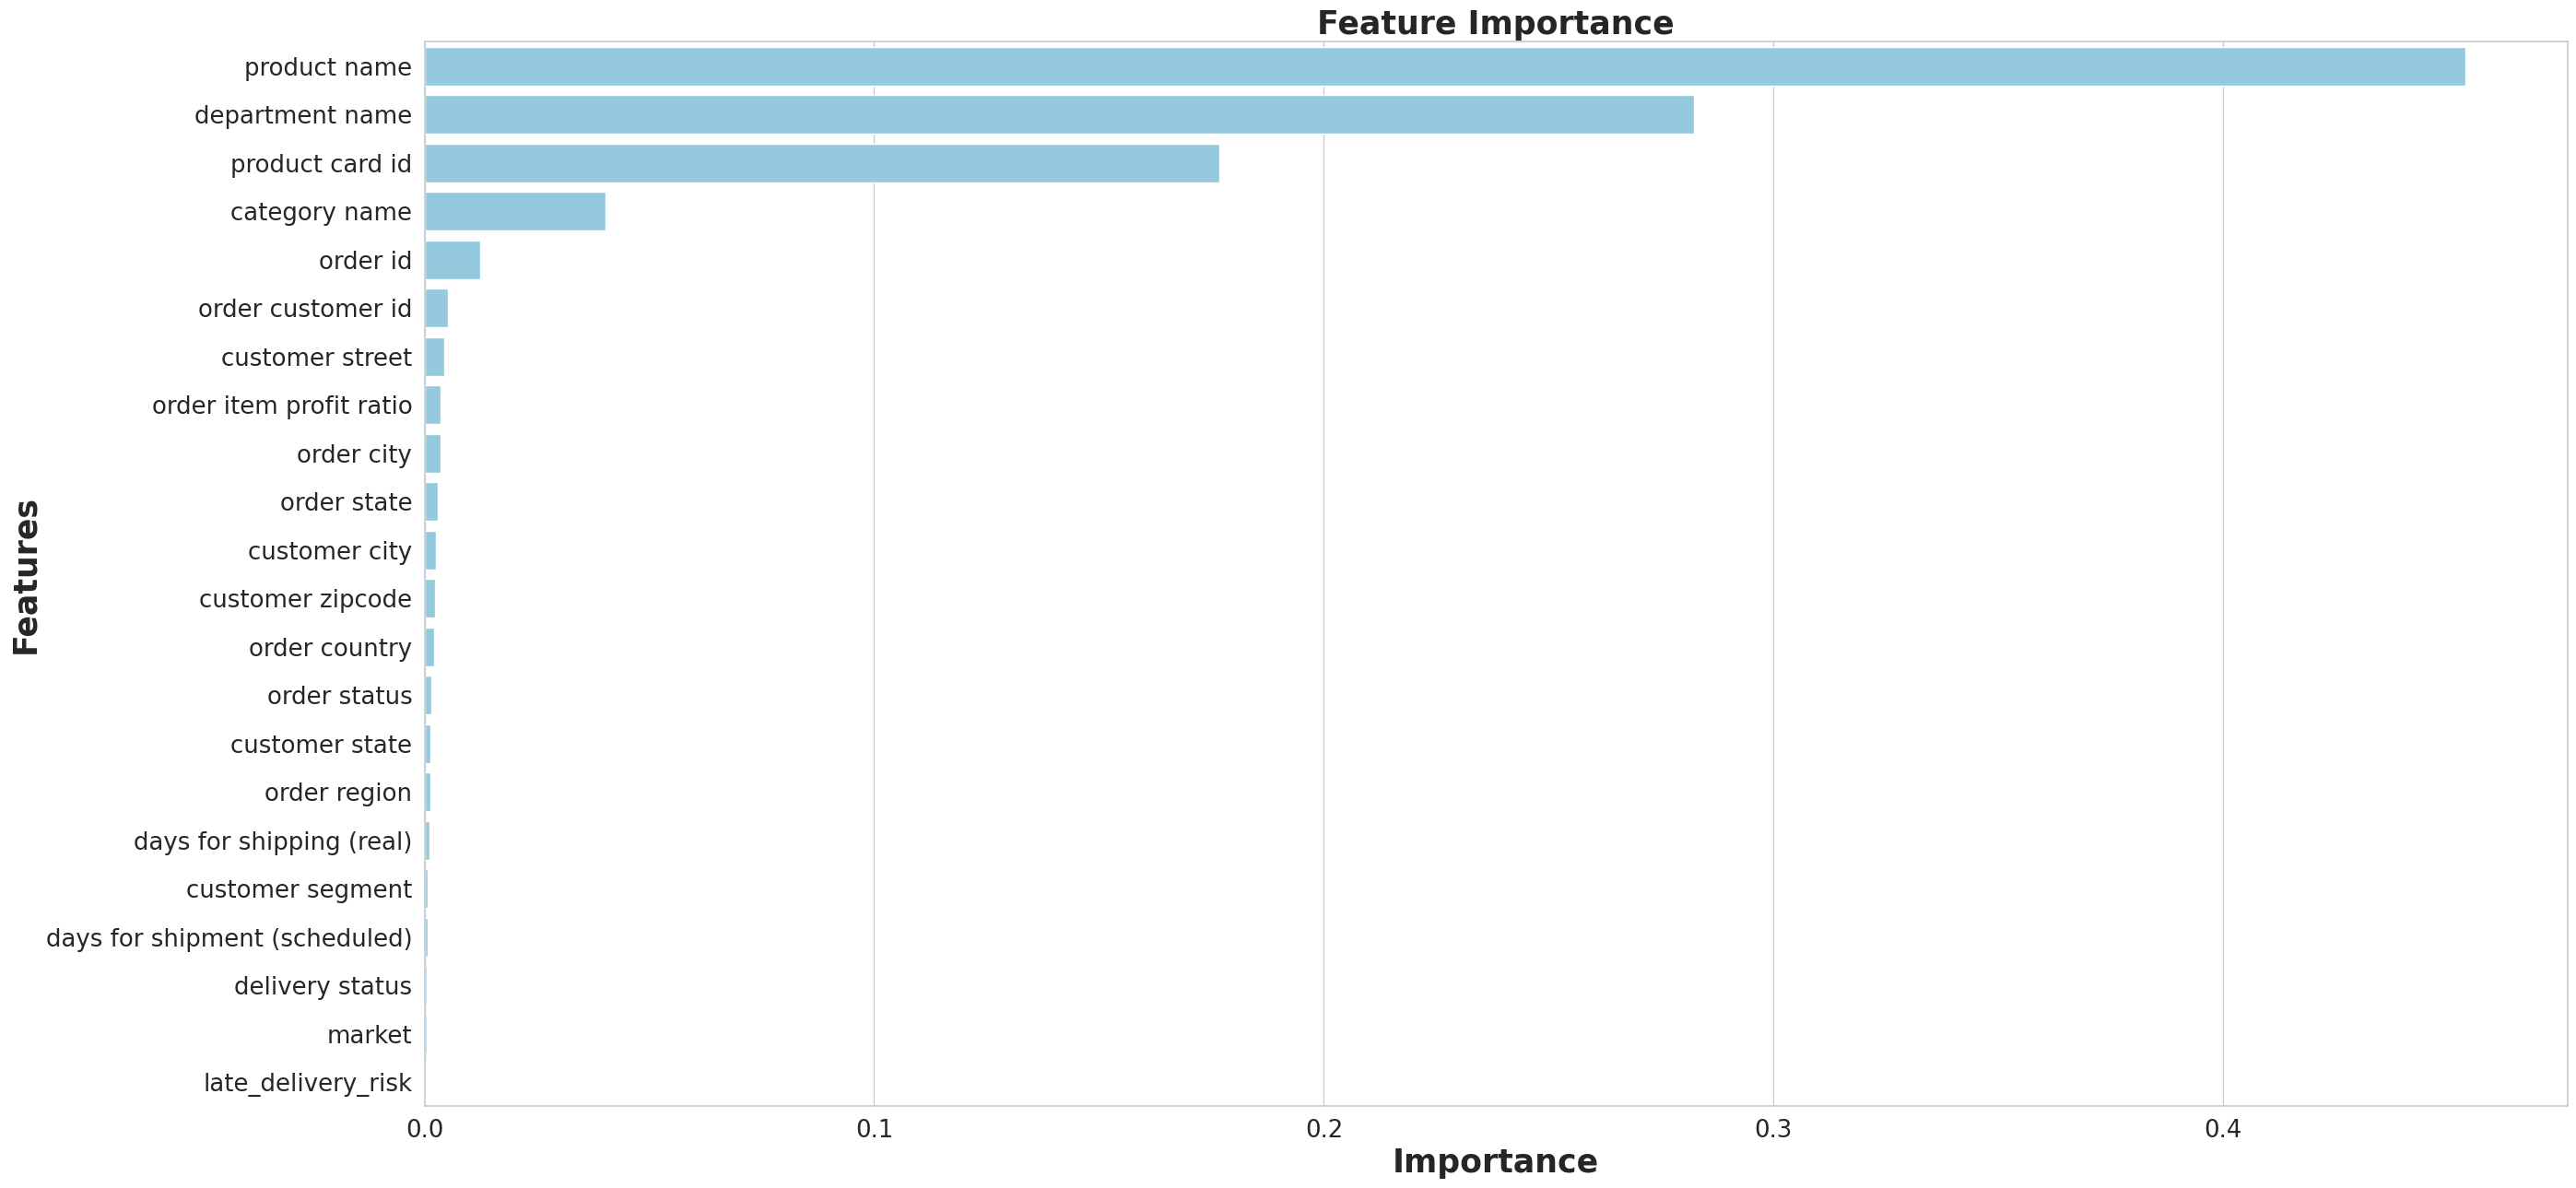

None

,Features,Gini-Importance
0,product name,0.453770
1,department name,0.282237
2,product card id,0.176785
3,category name,0.040179
4,order id,0.012341
5,order customer id,0.005186
6,customer street,0.004311
7,order item profit ratio,0.003617
8,order city,0.003614
9,order state,0.003072


In [ ]:
import seaborn as sns


feats = {}
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

'order id', 'order customer id' - самыми значимыми факторы, следом идут 'category name_Camping & Hiking', 'category name_Fishing', 'product name_Nike Men's Free 5.0+ Running Shoe'

Информация о заказе и категория товаров являются важными факторами для компании, на них необходимо сфокусировать свое внимание, улучшать и развивать. Если разобрать категории товаров по их значимости, можно увидеть, что компания делает акцент на товары для туризма и спортивную обувь. Еще одной важной задачей для компании является развитие других категорий товаров. Это необходимо, если компания хочет выйти на новые рынки и увеличить продажи.


**Выводы**

В данной исследовательской работе мы успешно создали модели машинного обучения для прогнозирования продаж компании DataCo. Global.

Модель Случайный лес (RandomForest) в сравнение с тривиальной моделью показала улучшение в 4.5 раза, что является отличным показателем для представленных нам данных. 

Также исследовали два противоположных метода кодировок. Это позволило нам сравнить полученные результаты и выбрать наилучший способ подготовки данных к прогнозированию.

Выделили значимые факторы, которые влияют на продажи и малозначимые, такие на которые компания могла бы обратить свое внимание и улучшить положение на рынке.

Таким образом, машинное обучение облегчает анализ больших данных в сфере логистики разного уровня и направлений. Оно позволяет решать самые разнообразные задачи, помогает компаниям лучше продвигать свои продукты и делать более точные прогнозы продаж.
